In [3]:
from groundingdino.util.inference import load_model, load_image, predict, annotate, batch_predict
import cv2
import torch
from tennis_tracker.download_data.extract_keypoints import read_json_file, write_to_jsonl_file

model = load_model(
    "/Users/derek/Desktop/tennis_tracker/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", 
    "/Users/derek/Desktop/tennis_tracker/GroundingDINO/groundingdino_swint_ogc.pth"
)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)
TEXT_PROMPT = "tennis player"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25
JSONL_PATH = "/Users/derek/Desktop/tennis_tracker/tennis_tracker/download_data/labels.json"

data = read_json_file(JSONL_PATH)
model = torch.compile(model)

final text_encoder_type: bert-base-uncased


In [ ]:
import os

batch_size = 10
images = os.listdir("/Users/derek/Desktop/GroundingDINO/oct15")
OUTPUT_JSONL_PATH = "boxes.jsonl"

for i in tqdm(range(0, len(img_paths), batch_size)):
    batch_images = images[i:i+batch_size]
    loaded_images = []
    for image in batch_images:
        image_source, image = load_image(image)
        loaded_images.append(image)
    input_images = torch.stack(loaded_images)
    boxes, logits, boxes_to_im = batch_predict(
        model=model,
        preprocessed_images=input_images,
        caption=TEXT_PROMPT,
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD,
        device=device
    )
    lines = []
    for im_num in range(len(batch_images)):
        # get all the boxes that correspond to this image
        im_boxes = boxes[torch.Tensor(boxes_to_im) == im_num]
        all_boxes = []
        for box in im_boxes:
            all_boxes.append(f"0 {box[0]} {box[1]} {box[2]} {box[3]}")
        lines.append(all_boxes)
    if len(lines) > 100:
        write_to_jsonl_file(OUTPUT_JSONL_PATH, lines)
    


In [4]:
import urllib.parse
input_string = "/Users/derek/Desktop/tennis_tracker/tennis_tracker/download_data/frames/Jannik Sinner vs Carlos Alcaraz For The Title! \ud83c\udfc6 \uff5c Beijing 2024 Final Highlights [Kv_obyZNKl4]/100.png"
urllib.parse.unquote("\ud83c\udfc6")

'\ud83c\udfc6'

In [1]:
from tennis_tracker.download_data.extract_keypoints import read_json_file
from tennis_tracker.player_location.homography import transform_points
import numpy as np

file_path = "/Users/derek/Desktop/tennis_tracker/tennis_tracker/download_data/labels.json"
data = read_json_file(file_path)
img_path = list(data.keys())[0]
img_dims = data[img_path]['image_dims'].copy()
m = np.array(data[img_path]['m'].copy())
im_boxes = [[.55, .55, .1, .1]]
output = transform_points(m, im_boxes, img_dims)

In [5]:
output

[[239.55728149414062, 699.5716552734375]]

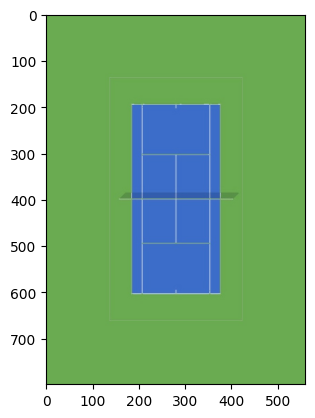

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/Users/derek/Desktop/tennis_tracker/tennis_tracker/player_location/padded_court.jpg")
plt.imshow(img)